In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
import glob
import cv2

In [2]:
dataset=r'C:\Users\user\Desktop\Project\Dataset\train'

In [3]:
import pathlib 

dataset=pathlib.Path(dataset)
images=list(dataset.glob('*/*.jpg'))
image_count=len(images)
print("Number of images = ",image_count)

Number of images =  7626


In [5]:
blast=list(dataset.glob('blast/*'))
dead_heart=list(dataset.glob('dead_heart/*'))
hispa=list(dataset.glob('hispa/*'))
normal=list(dataset.glob('normal/*'))
tungro=list(dataset.glob('tungro/*'))

<Axes: >

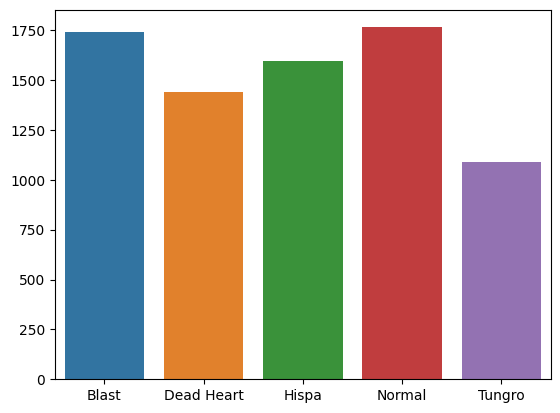

In [6]:
x=['Blast','Dead Heart','Hispa','Normal','Tungro']
y=[len(blast),len(dead_heart),len(hispa),len(normal),len(tungro)]
sns.barplot(x=x,y=y)

In [7]:
label_dict={
    'blast':0,
    'dead_heart':1,
    'hispa':2,
    'normal':3,
    'tungro':4
}

image_dict={
    'blast':list(dataset.glob('blast/*')),
    'dead_heart':list(dataset.glob('dead_heart/*')),
    'hispa':list(dataset.glob('hispa/*')),
    'normal':list(dataset.glob('normal/*')),
    'tungro':list(dataset.glob('tungro/*'))
}

In [8]:
x,y=[],[]

for dis_name,dis_image in image_dict.items():
    for image in dis_image:
        img = cv2.imread(str(image))
        re_img= cv2.resize(img,(200,200))
        x.append(re_img)
        y.append(label_dict[dis_name])
        
x=np.array(x)
y=np.array(y)

In [9]:
x_train,x_test_d,y_train,y_test_d=train_test_split(x,y,train_size=0.7,stratify=y)

In [10]:
x_test,x_val,y_test,y_val=train_test_split(x_test_d,y_test_d,test_size=0.4)

In [12]:
print("Train Data = ",len(x_train))

Train Data =  5338


In [13]:
print("Test Data = ",len(x_test))
print("Validation Data = ",len(x_val))

Test Data =  1372
Validation Data =  916


In [15]:
# Creating the model using VGG16

num_classes=5
model = Sequential()
model.add(VGG16(weights='imagenet', include_top=False,pooling='avg',input_shape=(200,200,3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable=False             
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 14,747,845
Trainable params: 33,157
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
from keras.utils import to_categorical

num_epochs = 10
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
history=model.fit(x_train,y_train_cat,validation_data=(x_val,y_val_cat),epochs=num_epochs)

Epoch 1/20
167/167 [==============================] - 327s 2s/step - loss: 1.6515 - accuracy: 0.4537 - val_loss: 0.9627 - val_accuracy: 0.6310
Epoch 2/20
167/167 [==============================] - 321s 2s/step - loss: 0.9363 - accuracy: 0.6368 - val_loss: 0.8031 - val_accuracy: 0.6867
Epoch 3/20
167/167 [==============================] - 319s 2s/step - loss: 0.7623 - accuracy: 0.7227 - val_loss: 0.6634 - val_accuracy: 0.7576
Epoch 4/20
167/167 [==============================] - 320s 2s/step - loss: 0.6579 - accuracy: 0.7595 - val_loss: 0.6090 - val_accuracy: 0.7598
Epoch 5/20
167/167 [==============================] - 319s 2s/step - loss: 0.5851 - accuracy: 0.7838 - val_loss: 0.5615 - val_accuracy: 0.7948
Epoch 6/20
167/167 [==============================] - 319s 2s/step - loss: 0.5195 - accuracy: 0.8168 - val_loss: 0.5218 - val_accuracy: 0.8111
Epoch 7/20
167/167 [==============================] - 319s 2s/step - loss: 0.4687 - accuracy: 0.8312 - val_loss: 0.5071 - val_accuracy: 0.8122

In [20]:
model_hist=pd.DataFrame(history.history)

In [21]:
model_hist

,loss,accuracy,val_loss,val_accuracy
0,1.651521,0.453728,0.962703,0.631004
1,0.936322,0.636755,0.803088,0.686681
2,0.762338,0.722743,0.663394,0.757642
3,0.657854,0.759460,0.608958,0.759825
4,0.585077,0.783814,0.561477,0.794760
5,0.519520,0.816785,0.521781,0.811135
6,0.468662,0.831210,0.507143,0.812227
7,0.440223,0.843574,0.486034,0.820961
8,0.399651,0.868303,0.435934,0.831878
9,0.362351,0.874860,0.439375,0.834061


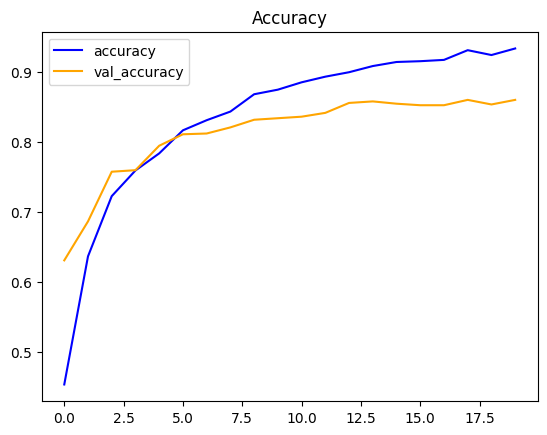

In [19]:
plt.plot(history.history['accuracy'],color='blue',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

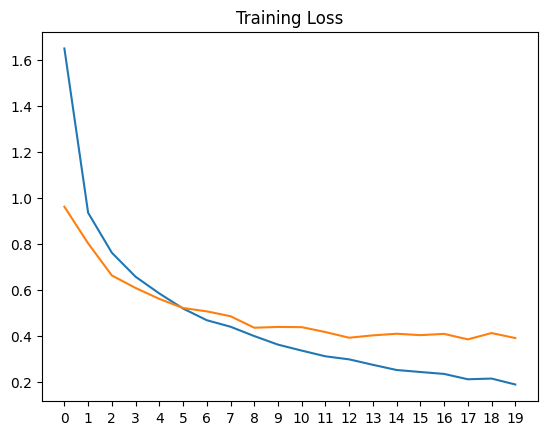

In [24]:
x=list(range(0,num_epochs))
plt.plot(model_hist['loss'])
plt.plot(model_hist['val_loss'])
plt.xticks(x)
plt.title("Training Loss")
plt.show()

In [25]:
y_test_cat=to_categorical(y_test,num_classes=num_classes)
y_pred_vgg16=model.predict(x_test)
y_pred_vgg16=np.argmax(y_pred_vgg16,axis=1)

43/43 [==============================] - 72s 2s/step


In [26]:
print(classification_report(y_pred_vgg16,y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       335
           1       0.86      0.92      0.89       236
           2       0.88      0.84      0.86       283
           3       0.87      0.86      0.86       339
           4       0.74      0.85      0.79       179

    accuracy                           0.85      1372
   macro avg       0.84      0.85      0.85      1372
weighted avg       0.85      0.85      0.85      1372



Accuracy of Neural Network with VGG16 =  84.99 %


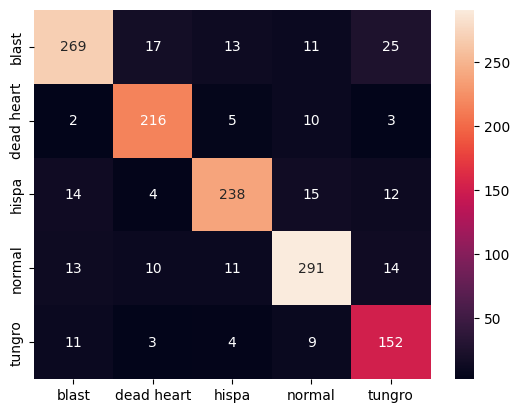

In [27]:
labels=['blast','dead heart','hispa','normal','tungro']
acc_vgg16=round(accuracy_score(y_pred_vgg16,y_test)*100,2)
print("Accuracy of Neural Network with VGG16 = ",acc_vgg16,"%")
conf_mat_vgg16=confusion_matrix(y_pred_vgg16,y_test)
sns.heatmap(conf_mat_vgg16,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
x_train=x_train.reshape(len(x_train),200*200*3)
x_test=x_test.reshape(len(x_test),200*200*3)

In [30]:
rf=RandomForestClassifier()

In [31]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_pred_rf=rf.predict(x_test)

In [33]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       403
           1       0.69      0.66      0.67       260
           2       0.52      0.66      0.58       215
           3       0.73      0.61      0.67       400
           4       0.29      0.64      0.40        94

    accuracy                           0.60      1372
   macro avg       0.58      0.62      0.58      1372
weighted avg       0.65      0.60      0.62      1372



Accuracy of Random Forest =  60.5 %


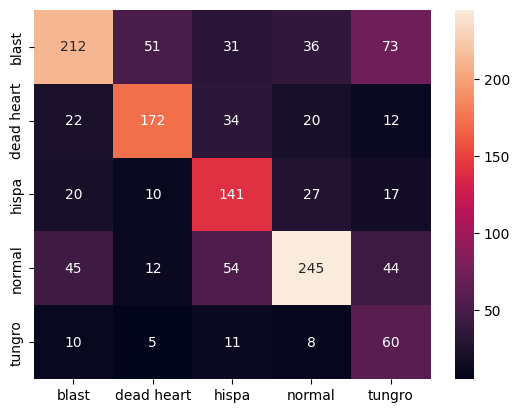

In [34]:
conf_mat_rf=confusion_matrix(y_pred_rf,y_test)
acc_rf=round(accuracy_score(y_pred_rf,y_test)*100,2)
print("Accuracy of Random Forest = ",acc_rf,"%")
sns.heatmap(conf_mat_rf,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
plt.show()

In [35]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

In [36]:
nb.fit(x_train,y_train)

GaussianNB()

In [37]:
y_pred_nb=nb.predict(x_test)

In [38]:
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.48      0.44      0.46       338
           1       0.38      0.48      0.43       198
           2       0.25      0.35      0.29       190
           3       0.61      0.53      0.57       392
           4       0.46      0.37      0.41       254

    accuracy                           0.45      1372
   macro avg       0.44      0.43      0.43      1372
weighted avg       0.47      0.45      0.45      1372



Accuracy of Bayesian classifier =  44.61 %


<Axes: >

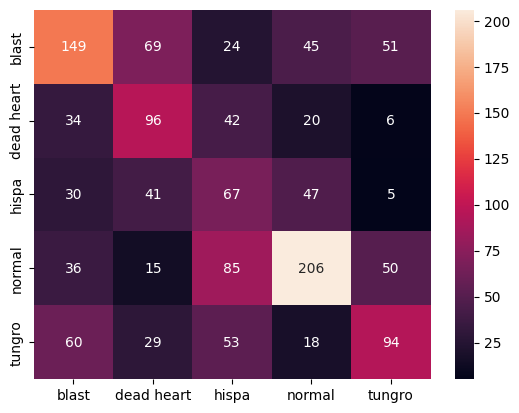

In [39]:
conf_mat_nb=confusion_matrix(y_pred_nb,y_test)
acc_nb=round(accuracy_score(y_pred_nb,y_test)*100,2)
print("Accuracy of Bayesian classifier = ",acc_nb,"%")
sns.heatmap(conf_mat_nb,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [42]:
y_pred_knn20=knn.predict(x_test)

In [43]:
print(classification_report(y_pred_knn20,y_test))

              precision    recall  f1-score   support

           0       0.33      0.62      0.43       162
           1       0.44      0.76      0.56       147
           2       0.69      0.36      0.47       523
           3       0.50      0.40      0.45       420
           4       0.26      0.44      0.33       120

    accuracy                           0.45      1372
   macro avg       0.44      0.52      0.45      1372
weighted avg       0.53      0.45      0.46      1372



Accuracy of KNN with 20 Neighbors =  45.26 %


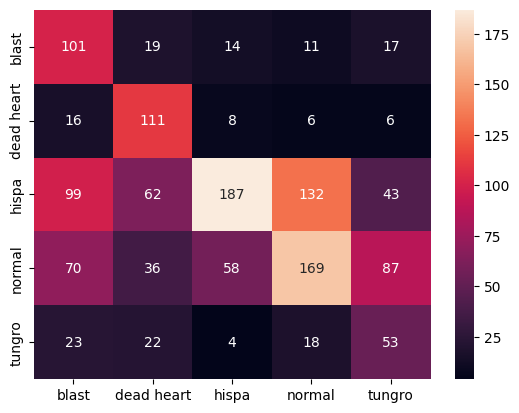

In [44]:
conf_mat_knn=confusion_matrix(y_pred_knn20,y_test)
acc_knn20=round(accuracy_score(y_pred_knn20,y_test)*100,2)
print("Accuracy of KNN with 20 Neighbors = ",acc_knn20,"%")
sns.heatmap(conf_mat_knn,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
plt.show()

In [45]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
y_pred_knn10=knn.predict(x_test)

Accuracy of KNN with 10 Neighbors=  51.9 %


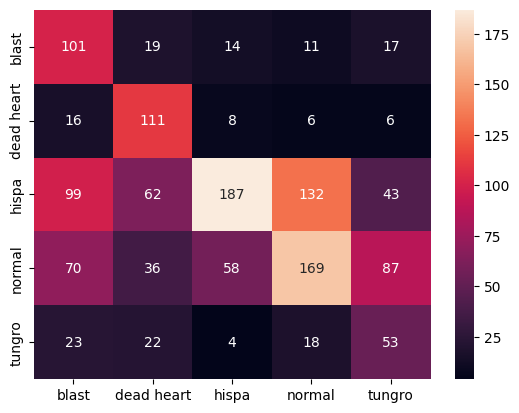

In [47]:
conf_mat_knn10=confusion_matrix(y_pred_knn10,y_test)
acc_knn10=round(accuracy_score(y_pred_knn10,y_test)*100,2)
print("Accuracy of KNN with 10 Neighbors= ",acc_knn10,"%")
sns.heatmap(conf_mat_knn,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
plt.show()

In [48]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn5=knn.predict(x_test)

In [49]:
print(classification_report(y_pred_knn5,y_test))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65       234
           1       0.59      0.81      0.68       181
           2       0.79      0.47      0.59       462
           3       0.54      0.55      0.54       333
           4       0.44      0.56      0.49       162

    accuracy                           0.59      1372
   macro avg       0.59      0.63      0.59      1372
weighted avg       0.62      0.59      0.59      1372



Accuracy of KNN with 5 Neighbors=  59.04 %


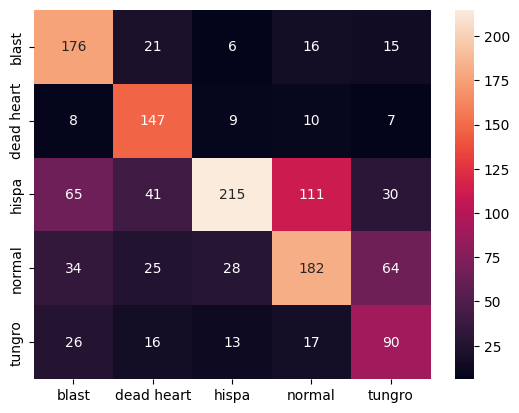

In [50]:
conf_mat_knn=confusion_matrix(y_pred_knn5,y_test)
acc_knn5=round(accuracy_score(y_pred_knn5,y_test)*100,2)
print("Accuracy of KNN with 5 Neighbors= ",acc_knn5,"%")
sns.heatmap(conf_mat_knn,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
plt.show()

In [51]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [52]:
y_pred_knn2=knn.predict(x_test)

In [53]:
print(classification_report(y_pred_knn2,y_test))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       323
           1       0.71      0.82      0.76       216
           2       0.83      0.53      0.65       424
           3       0.54      0.61      0.58       296
           4       0.44      0.80      0.56       113

    accuracy                           0.66      1372
   macro avg       0.66      0.70      0.66      1372
weighted avg       0.70      0.66      0.67      1372



Accuracy of KNN with 2 Neighbors =  66.47 %


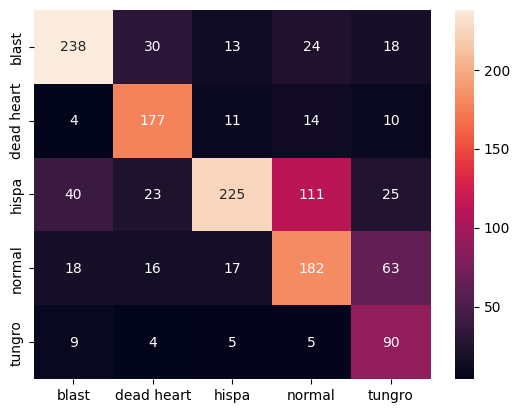

In [54]:
conf_mat_knn=confusion_matrix(y_pred_knn2,y_test)
acc_knn2=round(accuracy_score(y_pred_knn2,y_test)*100,2)
print("Accuracy of KNN with 2 Neighbors = ",acc_knn2,"%")
sns.heatmap(conf_mat_knn,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
plt.show()

In [55]:
accuracies=[acc_vgg16,acc_rf,acc_nb,acc_knn20,acc_knn10,acc_knn5,acc_knn2]

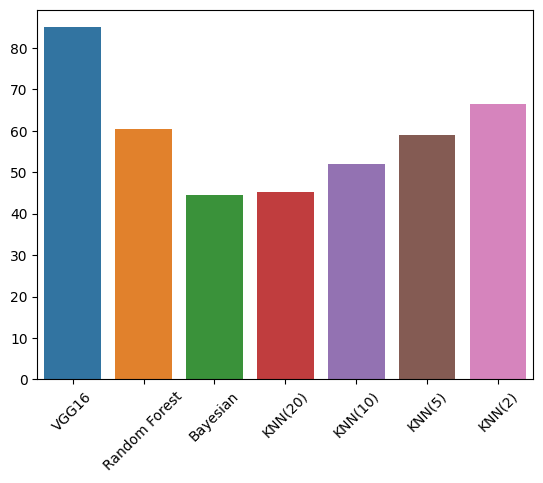

In [56]:
models=["VGG16","Random Forest","Bayesian","KNN(20)","KNN(10)","KNN(5)","KNN(2)"]
sns.barplot(x=models,y=accuracies)
plt.xticks(rotation=45)
plt.show()